In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 

from fnmatch import fnmatch


import matplotlib.pyplot as plt


# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (20, 10)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_csv('../data/MaterialInputDataMachineLearning.txt', delim_whitespace=True, header=None)
result = pd.read_csv('../data/OutputDataMachineLearning.txt', delim_whitespace=True, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,1,9.744375e+09,0.356487,5.266641e+11,0.279271,0.03,0.3
1,2,6.488627e+09,0.302243,1.232113e+11,0.137124,0.03,0.3
2,3,1.963719e+09,0.330547,4.588572e+11,0.315956,0.03,0.3
3,4,9.960097e+09,0.382041,1.455963e+11,0.123606,0.03,0.3
4,5,6.437510e+09,0.348520,8.645652e+11,0.129599,0.03,0.3


In [4]:
data = data[[1,2,3,4,6]]

In [5]:
result[4] = 0

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
rf = RandomForestRegressor(n_estimators = 200)
np.mean(cross_val_score(rf,data, result[1], cv = 4))

0.93085118188570737

In [8]:
result.head()

,0,1,2,3,4,5,6,7,8,9
0,1,2.664610e+10,1.306500e+10,279349000.0,0,2.676040e+10,413994000.0,0.0,0.0,6.373300e+09
1,2,1.416630e+10,5.466300e+09,116244000.0,0,1.421720e+10,202405000.0,0.0,0.0,4.154900e+09
2,3,4.963860e+09,2.177040e+09,56934400.0,0,4.988410e+09,84753000.0,0.0,0.0,1.310140e+09
3,4,2.825700e+10,1.514920e+10,272210000.0,0,2.833100e+10,400427000.0,0.0,0.0,6.193700e+09
4,5,1.723740e+10,8.116000e+09,186127000.0,0,1.731850e+10,276928000.0,0.0,0.0,4.274870e+09


In [9]:
for i in [1,2,3,5,6,9]:
    print i, np.mean(cross_val_score(rf,data, result[i], cv = 4))

1 0.92869425489
2 0.950890730978
3 0.849428930617
5 0.928533059067
6 0.853622575457
9 0.966219926429


In [10]:
data.head()

,1,2,3,4,6
0,9.744375e+09,0.356487,5.266641e+11,0.279271,0.3
1,6.488627e+09,0.302243,1.232113e+11,0.137124,0.3
2,1.963719e+09,0.330547,4.588572e+11,0.315956,0.3
3,9.960097e+09,0.382041,1.455963e+11,0.123606,0.3
4,6.437510e+09,0.348520,8.645652e+11,0.129599,0.3


In [11]:
data.describe()

,1,2,3,4,6
count,3.000000e+02,300.000000,3.000000e+02,300.000000,300.000000
mean,5.574183e+09,0.305267,4.987511e+11,0.222166,0.400000
std,2.836223e+09,0.059083,2.654900e+11,0.073148,0.081786
min,1.078529e+09,0.201779,4.610544e+10,0.102230,0.300000
25%,2.931881e+09,0.251675,2.931493e+11,0.158937,0.300000
50%,5.475158e+09,0.312091,4.872371e+11,0.216204,0.400000
75%,8.189232e+09,0.355053,6.915839e+11,0.285937,0.500000
max,9.960097e+09,0.398134,9.739165e+11,0.349943,0.500000


In [12]:
to_predict = pd.DataFrame(pd.read_csv('../data/CompositeData2.txt', header=None, delim_whitespace=True))
to_predict.columns = [1,2,3,4,6]

In [13]:
to_predict

,1,2,3,4,6
0,4.000000e+09,0.35,7.100000e+10,0.22,0.3
1,4.000000e+09,0.35,7.100000e+10,0.22,0.4
2,4.000000e+09,0.35,7.100000e+10,0.22,0.5
3,4.000000e+09,0.35,4.200000e+11,0.20,0.3
4,4.000000e+09,0.35,4.200000e+11,0.20,0.4
5,4.000000e+09,0.35,4.200000e+11,0.20,0.5


In [14]:
import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 2,
          "subsample": 0.8,
          'gamma':1.0,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 1000

res1 = []
for i in [1,2,3,5,6,9]:
    dtrain = xgb.DMatrix(data, result[i])
    gbm = xgb.train(params, dtrain, num_boost_round)
    pred1 = gbm.predict(xgb.DMatrix(to_predict))
    print i, pred1
    res1.append(pred1)

1 [  1.25773496e+10   1.51958303e+10   1.81430886e+10   1.27121787e+10
   1.65073152e+10   2.06791700e+10]
2 [  3.39630566e+09   4.28189670e+09   4.95327795e+09   4.15610342e+09
   5.33042278e+09   6.91880909e+09]
3 [  6.44337320e+07   9.36897920e+07   1.61047904e+08   1.44212880e+08
   1.95217312e+08   3.58579936e+08]
5 [  1.18430679e+10   1.42543636e+10   1.62346895e+10   1.21878067e+10
   1.52889692e+10   1.88786852e+10]
6 [  1.77295328e+08   2.82273472e+08   3.94848736e+08   2.34055664e+08
   3.99428736e+08   5.85347456e+08]
9 [  2.80113894e+09   3.58126029e+09   4.52505037e+09   2.70082227e+09
   3.68267469e+09   4.96375552e+09]


In [15]:
res1

[array([  1.25773496e+10,   1.51958303e+10,   1.81430886e+10,
          1.27121787e+10,   1.65073152e+10,   2.06791700e+10], dtype=float32),
 array([  3.39630566e+09,   4.28189670e+09,   4.95327795e+09,
          4.15610342e+09,   5.33042278e+09,   6.91880909e+09], dtype=float32),
 array([  6.44337320e+07,   9.36897920e+07,   1.61047904e+08,
          1.44212880e+08,   1.95217312e+08,   3.58579936e+08], dtype=float32),
 array([  1.18430679e+10,   1.42543636e+10,   1.62346895e+10,
          1.21878067e+10,   1.52889692e+10,   1.88786852e+10], dtype=float32),
 array([  1.77295328e+08,   2.82273472e+08,   3.94848736e+08,
          2.34055664e+08,   3.99428736e+08,   5.85347456e+08], dtype=float32),
 array([  2.80113894e+09,   3.58126029e+09,   4.52505037e+09,
          2.70082227e+09,   3.68267469e+09,   4.96375552e+09], dtype=float32)]

In [16]:
phi1 = 2*res1[5]/res1[0]
phi1

array([ 0.44542596,  0.47134775,  0.4988181 ,  0.42491886,  0.44618699,
        0.480073  ], dtype=float32)

In [17]:
nu_c1 = (phi1-1)/(phi1-2)
nu_c1

array([ 0.35673696,  0.34582898,  0.33385822,  0.36511207,  0.35642192,
        0.34207368], dtype=float32)

In [18]:
E1 = 2*res1[5]*(1+nu_c1)

In [19]:
E1

array([  7.60081715e+09,   9.63952845e+09,   1.20715520e+10,
         7.37385011e+09,   9.99052186e+09,   1.33234514e+10], dtype=float32)

In [20]:
a1 = pd.DataFrame(E1/(1e+9))
a1.columns = ['E']

In [21]:
a1['phi'] = pd.Series([0.3,0.4,0.5]*3)

In [22]:
a1.loc[a1.shape[0]] = [6.7, 0.3]
a1.loc[a1.shape[0]] = [8.37, 0.4]
a1.loc[a1.shape[0]] = [10.92, 0.5]

In [23]:
a1

,E,phi
0,7.600817,0.3
1,9.639528,0.4
2,12.071552,0.5
3,7.373850,0.3
4,9.990521,0.4
5,13.323451,0.5
6,6.700000,0.3
7,8.370000,0.4
8,10.920000,0.5


In [24]:
res2 = []
rf = RandomForestRegressor(n_estimators = 200)
for i in [1,2,3,5,6,9]:
    rf.fit(data, result[i])
    pred2 = rf.predict(to_predict)
    print i, pred2
    res2.append(pred2)

1 [  1.10616015e+10   1.33831265e+10   1.70375755e+10   1.10982365e+10
   1.35715760e+10   1.82207950e+10]
2 [  5.69639980e+09   6.52404835e+09   8.03725600e+09   5.90351710e+09
   6.81372680e+09   8.49312200e+09]
3 [  1.24461284e+08   1.51762953e+08   2.31057449e+08   1.41536489e+08
   1.77064962e+08   3.84680882e+08]
5 [  1.07986795e+10   1.31891925e+10   1.77213565e+10   1.09399280e+10
   1.33839990e+10   1.91060725e+10]
6 [  1.76553360e+08   2.68499375e+08   3.80513820e+08   1.83333890e+08
   3.01832220e+08   5.63753455e+08]
9 [  2.69428505e+09   3.41158945e+09   4.49815530e+09   2.69728330e+09
   3.40973200e+09   4.76065325e+09]


In [25]:
res2

[array([  1.10616015e+10,   1.33831265e+10,   1.70375755e+10,
          1.10982365e+10,   1.35715760e+10,   1.82207950e+10]),
 array([  5.69639980e+09,   6.52404835e+09,   8.03725600e+09,
          5.90351710e+09,   6.81372680e+09,   8.49312200e+09]),
 array([  1.24461284e+08,   1.51762953e+08,   2.31057449e+08,
          1.41536489e+08,   1.77064962e+08,   3.84680882e+08]),
 array([  1.07986795e+10,   1.31891925e+10,   1.77213565e+10,
          1.09399280e+10,   1.33839990e+10,   1.91060725e+10]),
 array([  1.76553360e+08,   2.68499375e+08,   3.80513820e+08,
          1.83333890e+08,   3.01832220e+08,   5.63753455e+08]),
 array([  2.69428505e+09,   3.41158945e+09,   4.49815530e+09,
          2.69728330e+09,   3.40973200e+09,   4.76065325e+09])]

In [26]:
phi2 = 2*res2[5]/res2[0]
phi2

array([ 0.48714195,  0.50983445,  0.52802763,  0.48607422,  0.50248136,
        0.52255165])

In [27]:
nu_c2 = (phi2-1)/(phi2-2)
nu_c2

array([ 0.33899945,  0.32893362,  0.32063942,  0.33946564,  0.33222868,
        0.32315739])

In [28]:
E2 = 2*res2[5]*(1+nu_c2)

In [29]:
E2

array([  7.21529242e+09,   9.06755185e+09,   1.18808824e+10,
         7.22583660e+09,   9.08508551e+09,   1.25981870e+10])

In [30]:
a2 = pd.DataFrame(E2/(1e+9))
a2.columns = ['E']

In [31]:
a2['phi'] = pd.Series([0.3,0.4,0.5]*3)

In [32]:
a2

,E,phi
0,7.215292,0.3
1,9.067552,0.4
2,11.880882,0.5
3,7.225837,0.3
4,9.085086,0.4
5,12.598187,0.5


In [33]:
a2.loc[a2.shape[0]] = [7.709, 0.3]
a2.loc[a2.shape[0]] = [9.16, 0.4]
a2.loc[a2.shape[0]] = [12.91, 0.5]

In [34]:
a = pd.concat([a1, a2], ignore_index=True)
a

,E,phi
0,7.600817,0.3
1,9.639528,0.4
2,12.071552,0.5
3,7.373850,0.3
4,9.990521,0.4
5,13.323451,0.5
6,6.700000,0.3
7,8.370000,0.4
8,10.920000,0.5
9,7.215292,0.3


In [35]:
composite1 = [['Glass-epoxy-XGB', 'Glass-epoxy-RF', 'Glass-epoxy-FEM']]

In [36]:
composite2 = [['Boron-epoxy-XGB', 'Boron-epoxy-RF', 'Boron-epoxy-FEM']]

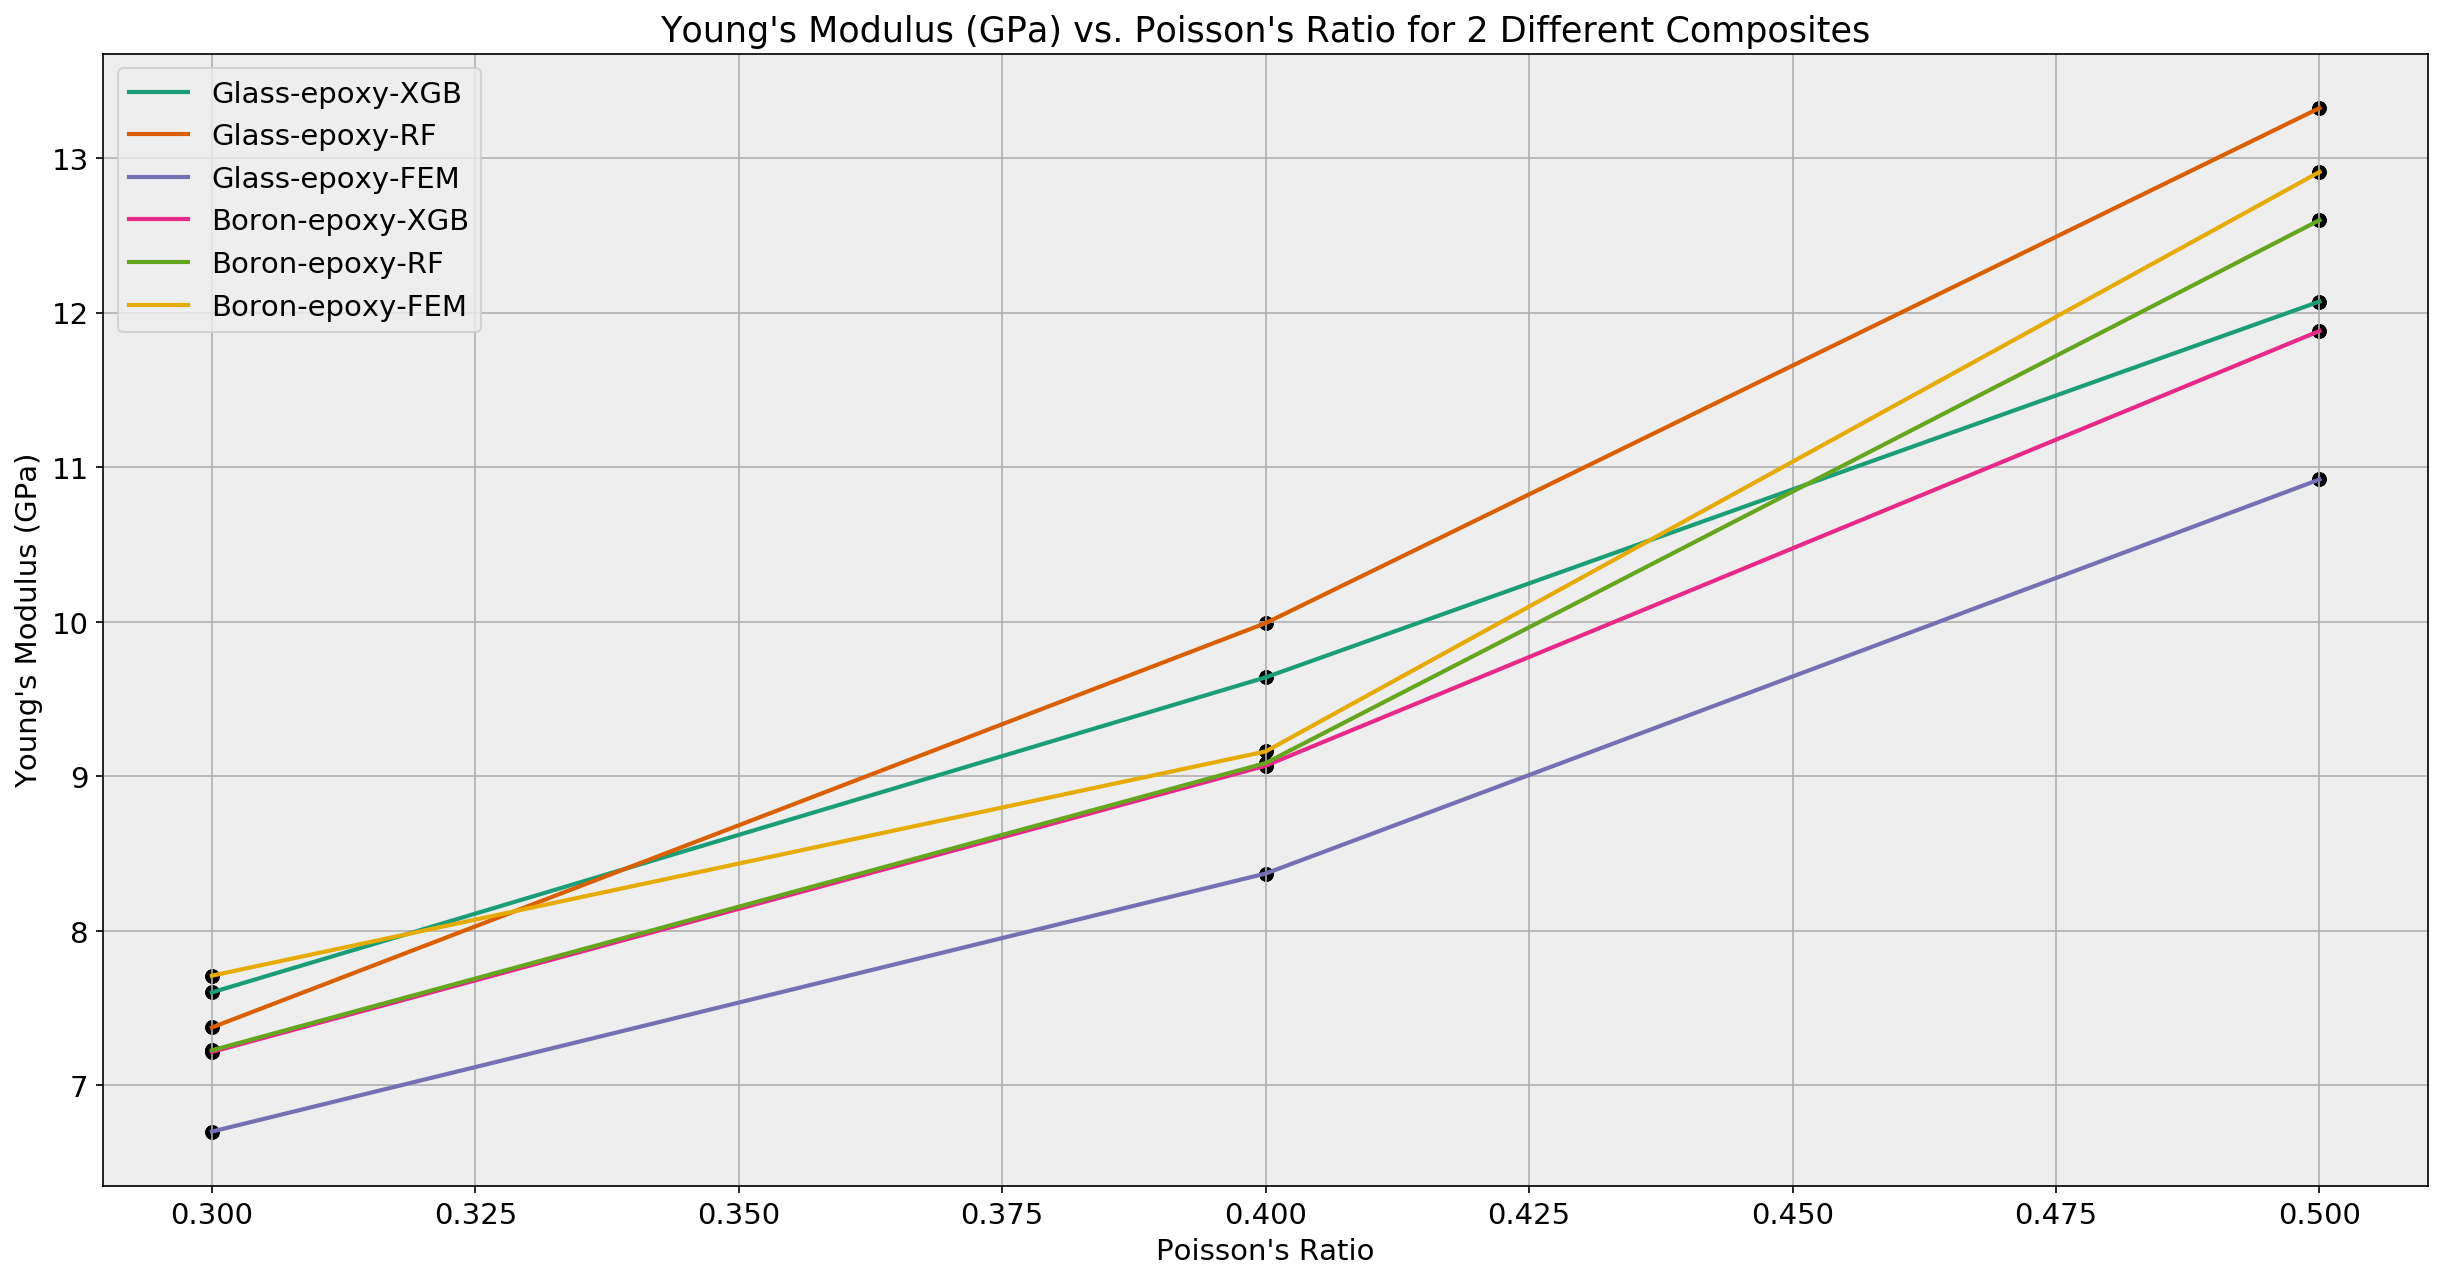

In [37]:
for j, composite in enumerate([composite1, composite2]):
    for i in range(0, len(composite[0])*3, 3):
        plt.plot(a['phi'][i+(9*j):i+(9*j)+3], a['E'][i+(9*j):i+(9*j)+3])
    plt.legend(composite1[0] + composite2[0])
    plt.scatter(a['phi'], a['E'], color='black')
    plt.xlabel("Poisson's Ratio")
    plt.ylabel("Young's Modulus (GPa)")
    plt.title("Young's Modulus (GPa) vs. Poisson's Ratio for 2 Different Composites")
plt.show()

In [38]:
for j in range(2):
    name = [composite1, composite2][j][0][0]
    print 'For ' + name[:len(name)-4] + ':'
    for i in range(0,3):
        print '\tphi = ' + str(a.loc[i+9*j]['phi'])
        print '\tXGB: ' + str(round(abs(a.loc[i+9*j]['E'] - a.loc[6+i+9*j]['E'])*100/a.loc[6+i+9*j]['E'], 2)) + '%'
        print '\tRF: ' + str(round(abs(a.loc[i+9*j+3]['E'] - a.loc[6+i+9*j]['E'])*100/a.loc[6+i+9*j]['E'], 2)) + '%'
        print

For Glass-epoxy:
	phi = 0.3
	XGB: 13.45%
	RF: 10.06%

	phi = 0.4
	XGB: 15.17%
	RF: 19.36%

	phi = 0.5
	XGB: 10.55%
	RF: 22.01%

For Boron-epoxy:
	phi = 0.3
	XGB: 6.4%
	RF: 6.27%

	phi = 0.4
	XGB: 1.01%
	RF: 0.82%

	phi = 0.5
	XGB: 7.97%
	RF: 2.42%

